# Decision Tree Model  : Regressor

Decision Tree is a machine learning algorithm that acts like a flowchart that helps make decisions which can be used for both classification and regression tasks. It builds a tree-like structure by recursively splitting data based on features, aiming to create decision rules for predicting outcomes. At each node, the algorithm selects the feature that best separates the data. Decision Trees are interpretable, capturing complex decision-making logic. They're sensitive to data quality and can suffer from overfitting, addressed by techniques like pruning.

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

# Set the seaborn visualization style
sns.set()

In [2]:
# Download data
df = yf.download("AAPL",start ='2019-12-31',end ='2023-12-30')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520813,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441444,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018700,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [3]:
# Make the copy of the data. We will work on the copied data.
data = df.copy()

In [4]:
# Inspect the data
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520813,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152657,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441444,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018700,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675270,108872000


In [5]:
# Check the shape of the data
data.shape

(1007, 6)

In [6]:
# Generate log returns
data['returns'] = np.log(data['Close'] / data['Close'].shift(1))

If the next day is up day, we will designate it with 1, else if it is a down day, we will mark it with -1.

In [7]:
# Create target values for regression (use 'returns' instead of 'target')
data['target'] = data['returns'].shift(-1)

In [8]:
# Creating features
features_list = []

# SD based features
for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).std()
    features_list.append(col_name)
    
# MA based features
for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)
    
# Daily pct change based features
for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)
    
# Feature based on volume
col_name = 'vma_4'
data[col_name] = data['Volume'].rolling(4).mean()
features_list.append(col_name)

# Intraday movement
col_name = 'co'
data[col_name] = data['Close'] - data['Open']
features_list.append(col_name)

# Exponential Moving Averages
for i in range(5, 21, 5):
    col_name = 'ema_' + str(i)
    data[col_name] = data['Close'].ewm(span=i, adjust=False).mean()
    features_list.append(col_name)

In [9]:
features_list

['std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'vma_4',
 'co',
 'ema_5',
 'ema_10',
 'ema_15',
 'ema_20']

In [10]:
# Removing nan values
data.dropna(inplace=True)

In [11]:
data[features_list + ['target']].head()

,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,ema_5,ema_10,ema_15,ema_20,target
Date,,,,,,,,,,,,,,,,,
2020-02-05,1.744018,1.495007,1.266561,79.271501,79.174001,78.790376,77.9285,0.038422,0.013566,0.009568,157205000.0,-0.517494,79.393871,79.144088,78.788289,78.376932,0.011629
2020-02-06,1.836846,1.623766,1.320023,79.421001,79.405168,79.065625,78.2441,0.052865,0.004331,0.024147,133664300.0,0.659996,80.030080,79.536526,79.102565,78.655558,-0.016056
2020-02-07,1.543320,1.634032,1.317667,79.464001,79.485001,79.195625,78.4409,0.003923,-0.010148,0.037624,119638200.0,-0.584999,80.022553,79.622158,79.215682,78.784314,0.004738
2020-02-10,0.598420,1.450435,1.337636,79.779000,79.532001,79.335875,78.6821,0.000518,0.038940,0.014085,112821300.0,1.842499,80.144201,79.761310,79.362159,78.936998,-0.006052
2020-02-11,0.551668,1.445260,1.336222,79.827000,79.582667,79.369000,78.8802,-0.017212,0.035653,-0.012881,106695400.0,-0.997505,80.063633,79.786981,79.429701,79.028950,0.023470


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test, y_train, y_test = train_test_split(data[features_list].iloc[:-1],
                                                    data.iloc[:-1]['target'],
                                                    test_size= 0.25, 
                                                    shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((735, 16), (735,), (246, 16), (246,))

In [14]:
# Import necessary packages
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error

In [15]:
DecisionTreeRegressor?

In [16]:
# Create a model
regressor_model = DecisionTreeRegressor(max_depth=4, random_state=1)

In [17]:
# Train the model
regressor_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=1)

In [18]:
# Predict on the training dataset
y_pred_train = regressor_model.predict(X_train)


In [19]:

# Calculate Mean Squared Error (MSE) on training data
mse_train = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error on training data:', mse_train)

# Calculate Mean Absolute Error (MAE) on training data
mae_train = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error on training data:', mae_train)

# Calculate R-squared (R2) on training data
r2_train = r2_score(y_train, y_pred_train)
print('R-squared on training data:', r2_train)

print('**********************************************')

Mean Squared Error on training data: 0.00045879321053987865
Mean Absolute Error on training data: 0.01584439801201693
R-squared on training data: 0.16215409658694335
**********************************************


In [20]:

# Predict on the testing dataset

y_pred_test = regressor_model.predict(X_test)

# Calculate Mean Squared Error (MSE) on testing data
mse_test = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error on testing data:', mse_test)

# Calculate Mean Absolute Error (MAE) on testing data
mae_test = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error on testing data:', mae_test)

# Calculate R-squared (R2) on testing data
r2_test = r2_score(y_test, y_pred_test)
print('R-squared on testing data:', r2_test)


Mean Squared Error on testing data: 0.0001596621063270241
Mean Absolute Error on testing data: 0.00969059415845825
R-squared on testing data: -0.013475174397668876


In [21]:
# Model accuracy on training data
print('Model R^2 score on training data:', regressor_model.score(X_train, y_train))

# Predict on a test dataset
y_pred = regressor_model.predict(X_test)

# Model accuracy on testing data
print('Model R^2 score on testing data:', regressor_model.score(X_test, y_test))


Model R^2 score on training data: 0.16215409658694335
Model R^2 score on testing data: -0.013475174397668876


In [22]:
from sklearn.tree import plot_tree

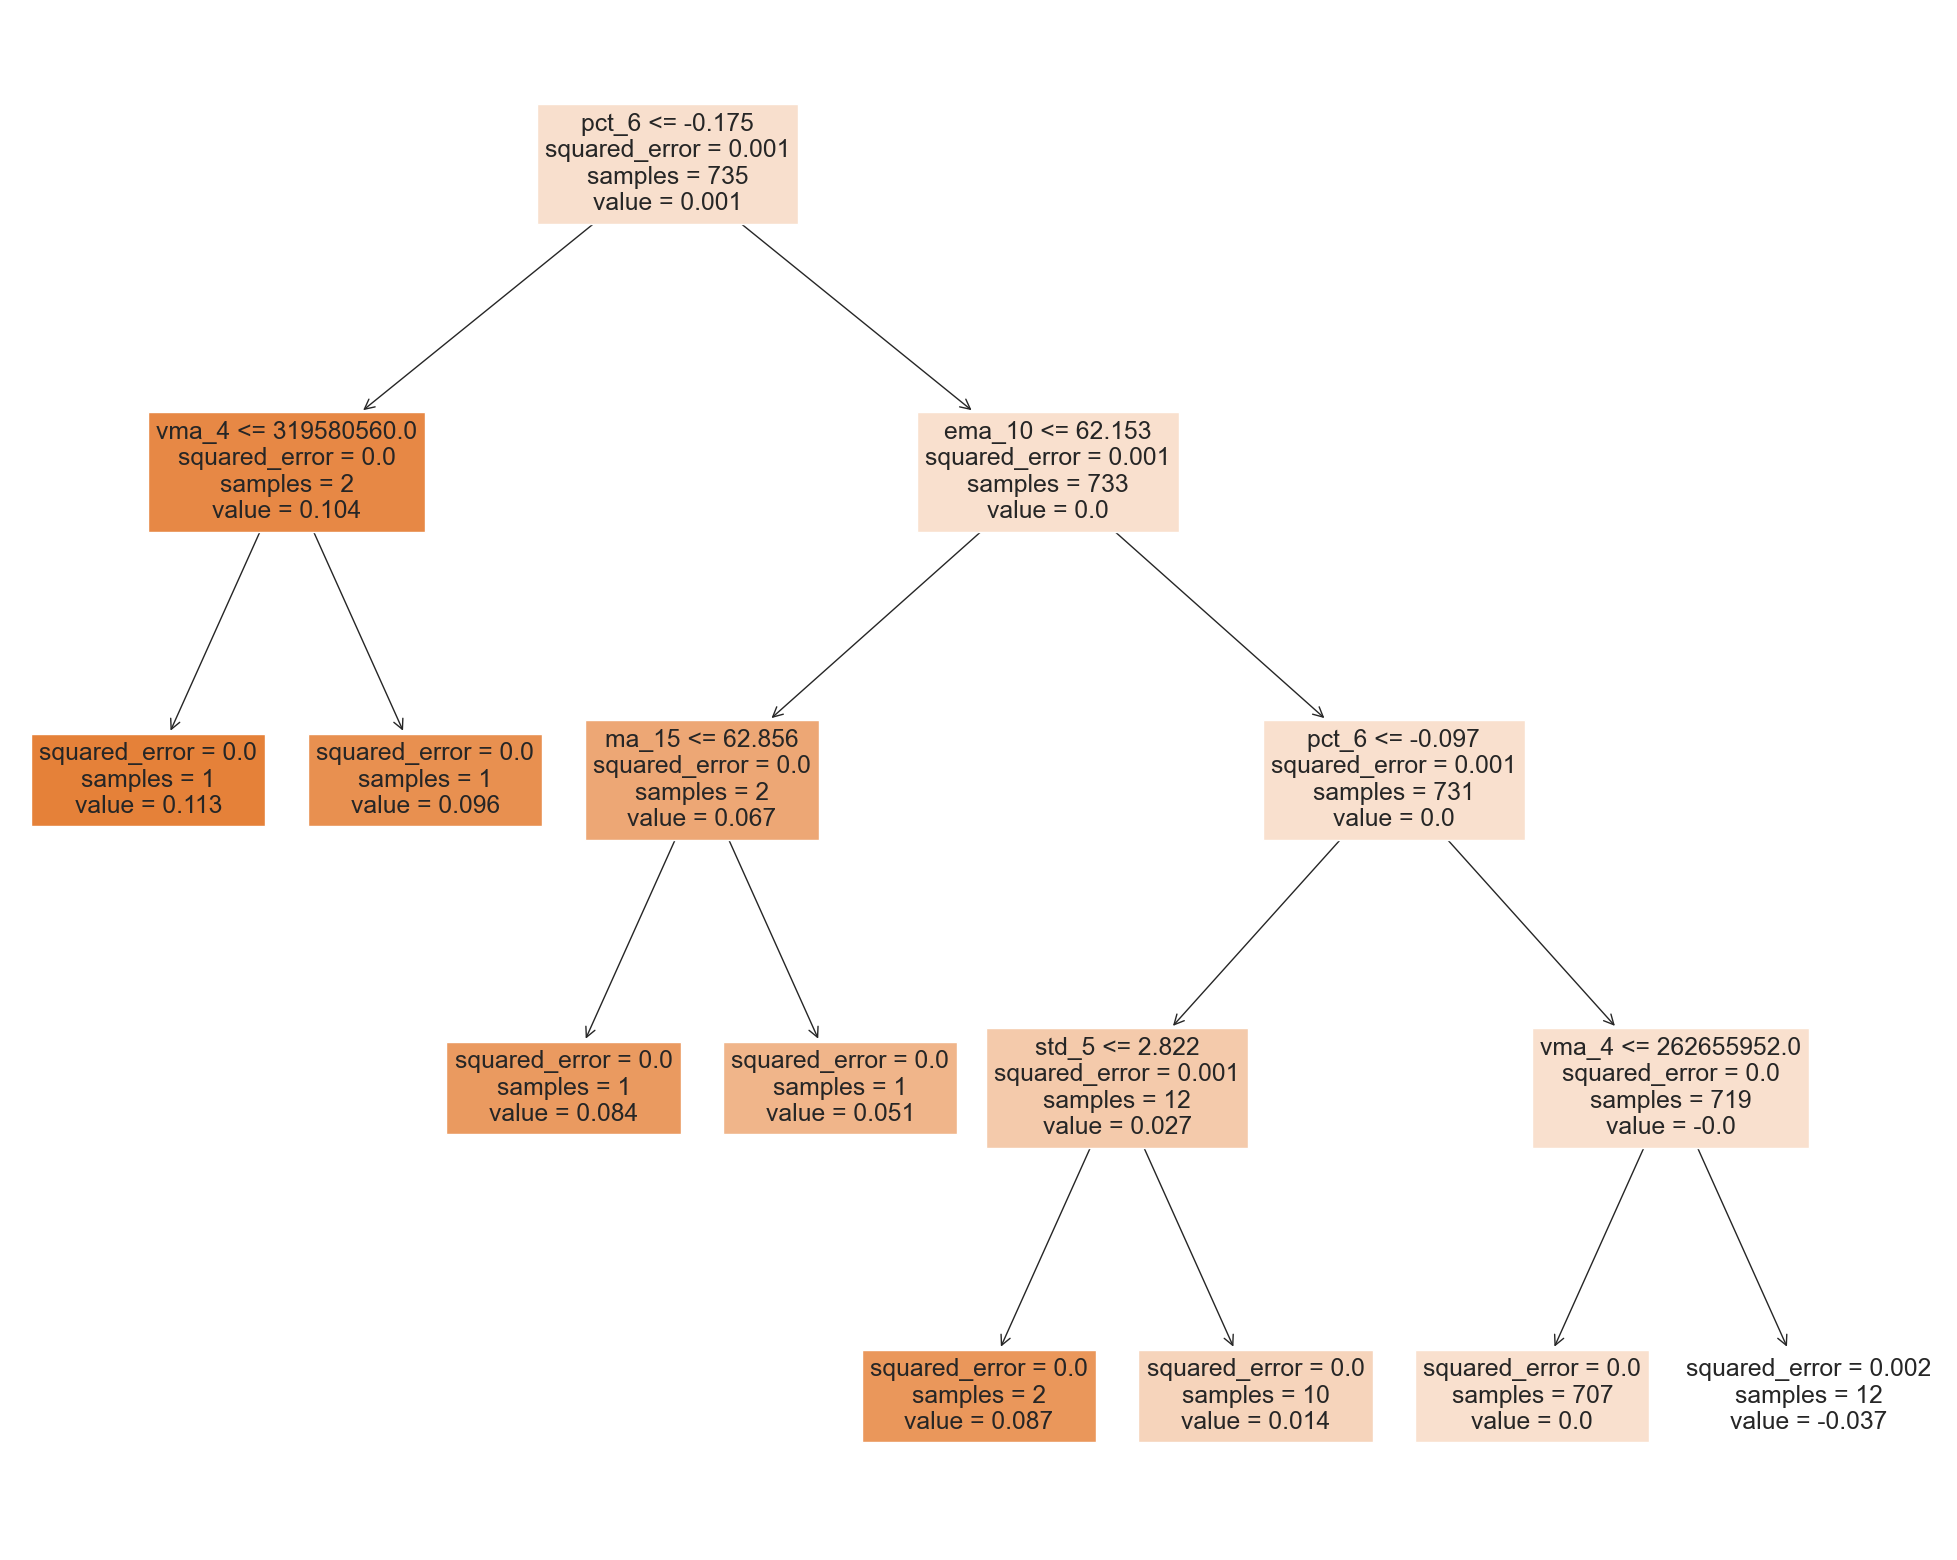

In [23]:
#Visualize the tree
fig = plt.figure(figsize=(25,20))

_ = plot_tree(regressor_model, 
              feature_names=features_list,
              class_names=['0','1'],
              filled=True)

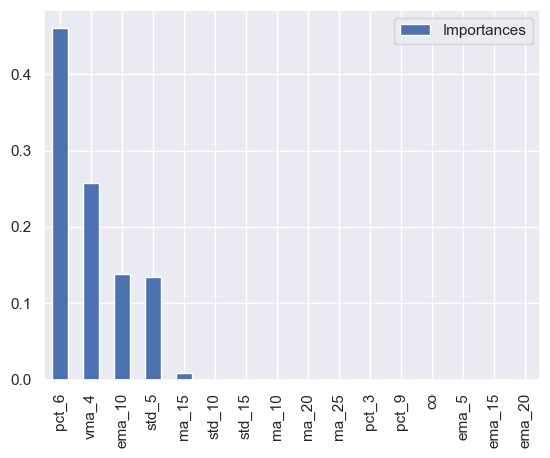

In [24]:
plot_df = pd.DataFrame({"Importances":regressor_model.feature_importances_}, index=features_list)
plot_df.sort_values('Importances', ascending=False).plot.bar();